# **1. ENVIRONMENT SETUP**

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [185]:
sns.set(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (12,6)

# **2. LOAD DATA**

In [186]:
df = pd.read_csv("Netflix Dataset.csv")
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


# **3. DATA CLEANING**

In [187]:
missing_table = pd.DataFrame(df.isnull().sum(), columns=["Missing Values"])
print("Missing values per column:\n")
print(tabulate(missing_table.reset_index().rename(columns={'index': 'Column'}),
               headers="keys", tablefmt="fancy_grid", showindex=False))
df = df.drop_duplicates()
df['Director'] = df['Director'].fillna("Unknown")
df['Cast'] = df['Cast'].fillna("Unknown")
df['Rating'] = df['Rating'].fillna("Not Rated")
df['Type'] = df['Type'].fillna("Unknown")
df['Category'] = df['Category'].fillna("Unknown")
df = df.dropna(subset=['Country'])
df = df[df['Country'].str.strip().str.lower() != "unknown"]
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['Year'] = df['Release_Date'].dt.year
df = df[df['Title'].str.contains(r'[A-Za-z]', regex=True)]
df = df[~df['Title'].str.match(r'^\d+[\d%:,-]*$')]
df[['Duration_Val', 'Duration_Unit']] = df['Duration'].str.extract(r'(\d+)\s*(\w+)')
df['Duration_Val'] = pd.to_numeric(df['Duration_Val'], errors='coerce')
df = df.reset_index(drop=True)
print("\nCleaned Dataset Preview:\n")
print(tabulate(df.head(10), headers="keys", tablefmt="fancy_grid", showindex=False))

Missing values per column:

╒══════════════╤══════════════════╕
│ Column       │   Missing Values │
╞══════════════╪══════════════════╡
│ Show_Id      │                0 │
├──────────────┼──────────────────┤
│ Category     │                0 │
├──────────────┼──────────────────┤
│ Title        │                0 │
├──────────────┼──────────────────┤
│ Director     │             2388 │
├──────────────┼──────────────────┤
│ Cast         │              718 │
├──────────────┼──────────────────┤
│ Country      │              507 │
├──────────────┼──────────────────┤
│ Release_Date │               10 │
├──────────────┼──────────────────┤
│ Rating       │                7 │
├──────────────┼──────────────────┤
│ Duration     │                0 │
├──────────────┼──────────────────┤
│ Type         │                0 │
├──────────────┼──────────────────┤
│ Description  │                0 │
╘══════════════╧══════════════════╛

Cleaned Dataset Preview:

╒═══════════╤════════════╤═══════════════════

# **4. DATA PREPROCESSING**

In [188]:
df['Year'] = df['Release_Date'].dt.year
df[['Duration_Val', 'Duration_Unit']] = df['Duration'].str.extract(r'(\d+)\s*(\w+)')
df['Duration_Val'] = pd.to_numeric(df['Duration_Val'], errors='coerce')
info_data = {
    "Column": df.columns,
    "Non-Null Count": [df[col].notnull().sum() for col in df.columns],
    "Dtype": [df[col].dtype for col in df.columns]
}
info_df = pd.DataFrame(info_data)
print("\nDataset Info:\n")
print(tabulate(info_df, headers="keys", tablefmt="fancy_grid", showindex=False))
describe_df = df.describe(include='all').T.reset_index().rename(columns={"index": "Column"})
print("\nDescriptive Statistics:\n")
print(tabulate(describe_df, headers="keys", tablefmt="fancy_grid", showindex=False))


Dataset Info:

╒═══════════════╤══════════════════╤════════════════╕
│ Column        │   Non-Null Count │ Dtype          │
╞═══════════════╪══════════════════╪════════════════╡
│ Show_Id       │             7256 │ object         │
├───────────────┼──────────────────┼────────────────┤
│ Category      │             7256 │ object         │
├───────────────┼──────────────────┼────────────────┤
│ Title         │             7256 │ object         │
├───────────────┼──────────────────┼────────────────┤
│ Director      │             7256 │ object         │
├───────────────┼──────────────────┼────────────────┤
│ Cast          │             7256 │ object         │
├───────────────┼──────────────────┼────────────────┤
│ Country       │             7256 │ object         │
├───────────────┼──────────────────┼────────────────┤
│ Release_Date  │             7163 │ datetime64[ns] │
├───────────────┼──────────────────┼────────────────┤
│ Rating        │             7256 │ object         │
├───────────

# **5. FILTERING DATA**

In [189]:
movies = df[df['Category'].str.strip().str.lower() == "movie"]
tv_shows = df[df['Category'].str.strip().str.lower() == "tv show"]
recent_content = df[df['Year'] >= 2015]
dramas = recent_content[recent_content['Type'].str.contains("Drama", case=False, na=False)]
dramas = dramas[~dramas['Title'].str.isnumeric()]
dramas_random = dramas.sample(frac=1, random_state=42)
sample_dramas = dramas_random[['Title','Year','Country']].head().reset_index(drop=True)
print("Number of Movies:", len(movies))
print("Number of TV Shows:", len(tv_shows))
print("Recent Content (2015+):", len(recent_content))
print("\nSample Dramas:")
print(tabulate(sample_dramas.values, headers=sample_dramas.columns, tablefmt="fancy_grid"))

Number of Movies: 5129
Number of TV Shows: 2127
Recent Content (2015+): 7108

Sample Dramas:
╒═══════════════════════════════════╤════════╤═══════════╕
│ Title                             │   Year │ Country   │
╞═══════════════════════════════════╪════════╪═══════════╡
│ Asoka                             │   2017 │ India     │
├───────────────────────────────────┼────────┼───────────┤
│ Bhai: Vyakti Ki Valli - Uttarardh │   2020 │ India     │
├───────────────────────────────────┼────────┼───────────┤
│ Holding the Man                   │   2016 │ Australia │
├───────────────────────────────────┼────────┼───────────┤
│ Varane Avashyamund                │   2020 │ India     │
├───────────────────────────────────┼────────┼───────────┤
│ Mystic Whispers                   │   2017 │ Singapore │
╘═══════════════════════════════════╧════════╧═══════════╛


# **6. EXPLORATORY DATA ANALYSIS (EDA)**

In [190]:
category_counts = df['Category'].value_counts().reset_index()
category_counts.columns = ["Category", "Count"]
print("\nMovies vs TV Shows:\n")
print(tabulate(category_counts, headers="keys", tablefmt="fancy_grid", showindex=False))
top_genres = df['Type'].value_counts().head(10).reset_index()
top_genres.columns = ["Genre", "Count"]
print("\nTop Genres:\n")
print(tabulate(top_genres, headers="keys", tablefmt="fancy_grid", showindex=False))
top_countries = df['Country'].value_counts().head(10).reset_index()
top_countries.columns = ["Country", "Count"]
print("\nTop Countries:\n")
print(tabulate(top_countries, headers="keys", tablefmt="fancy_grid", showindex=False))


Movies vs TV Shows:

╒════════════╤═════════╕
│ Category   │   Count │
╞════════════╪═════════╡
│ Movie      │    5129 │
├────────────┼─────────┤
│ TV Show    │    2127 │
╘════════════╧═════════╛

Top Genres:

╒══════════════════════════════════════════════════╤═════════╕
│ Genre                                            │   Count │
╞══════════════════════════════════════════════════╪═════════╡
│ Documentaries                                    │     322 │
├──────────────────────────────────────────────────┼─────────┤
│ Dramas, International Movies                     │     306 │
├──────────────────────────────────────────────────┼─────────┤
│ Stand-Up Comedy                                  │     293 │
├──────────────────────────────────────────────────┼─────────┤
│ Comedies, Dramas, International Movies           │     239 │
├──────────────────────────────────────────────────┼─────────┤
│ Dramas, Independent Movies, International Movies │     211 │
├────────────────────────────────

# **7. VISUALIZATION**

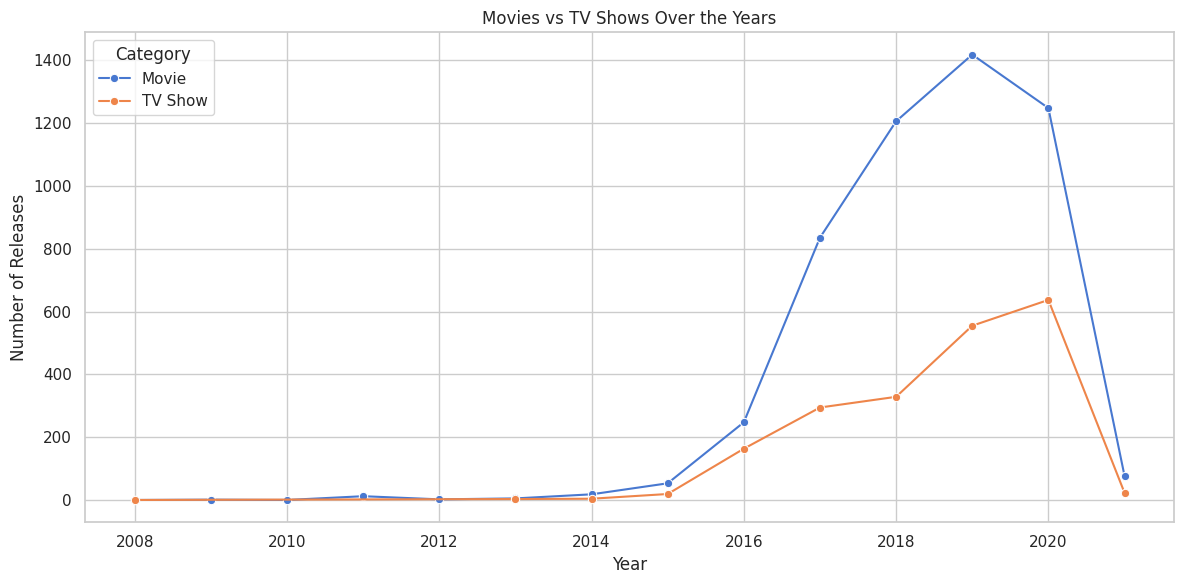

In [191]:
movies_tv = df.groupby(['Year','Category']).size().reset_index(name='Count')
sns.lineplot(data=movies_tv, x='Year', y='Count', hue='Category', marker="o")
plt.title("Movies vs TV Shows Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Releases")
plt.tight_layout()
plt.show()

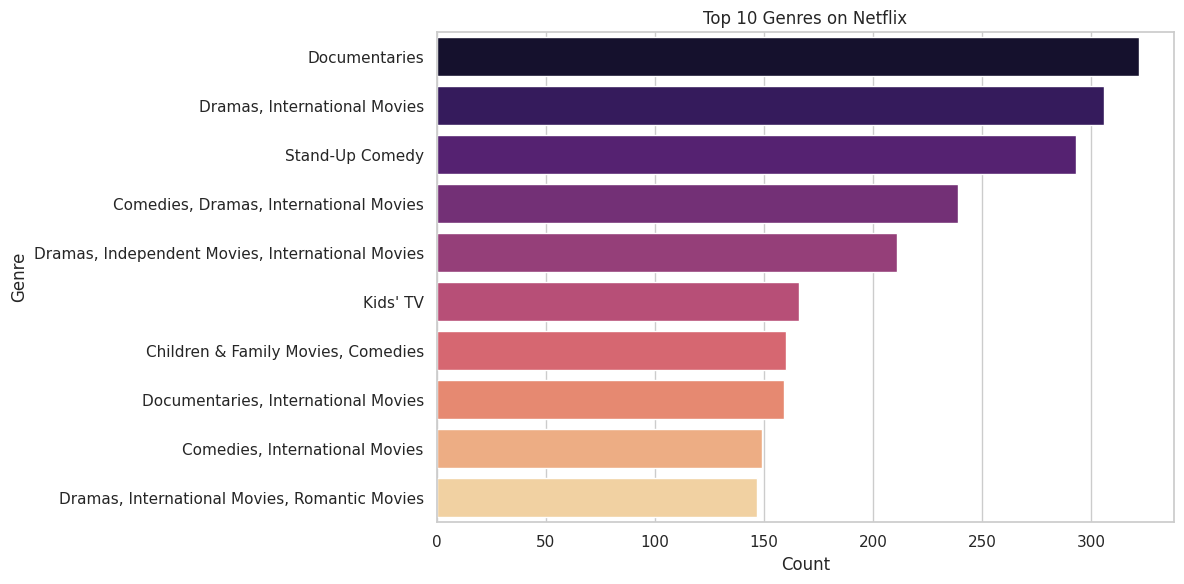

In [192]:
sns.barplot(x="Count", y="Genre", data=top_genres,
            hue="Genre", palette="magma",
            dodge=False, legend=False)
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

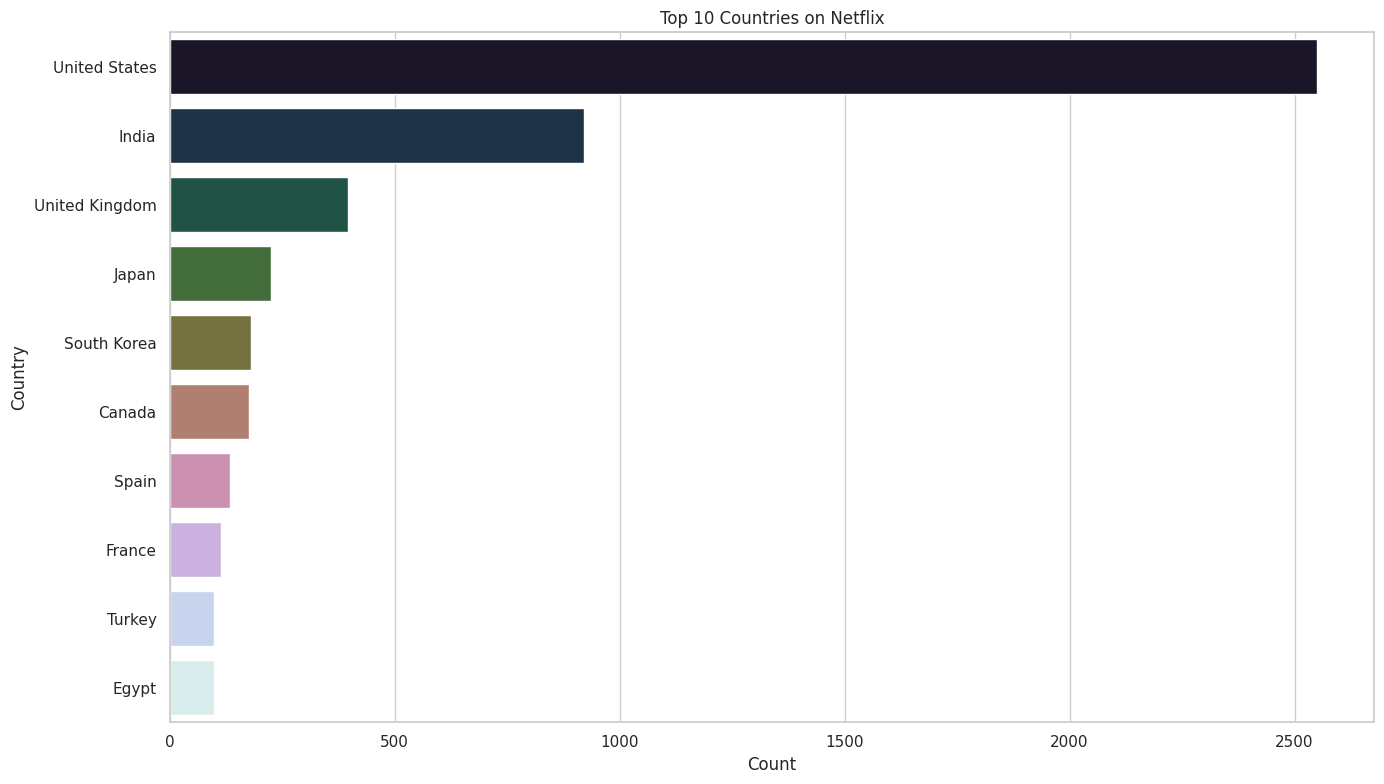

In [193]:
top_countries = df['Country'].value_counts().head(10).reset_index()
top_countries.columns = ["Country", "Count"]
plt.figure(figsize=(14,8))
sns.barplot(data=top_countries, x="Count", y="Country", hue="Country", palette="cubehelix", legend=False)
plt.title("Top 10 Countries on Netflix")
plt.xlabel("Count")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

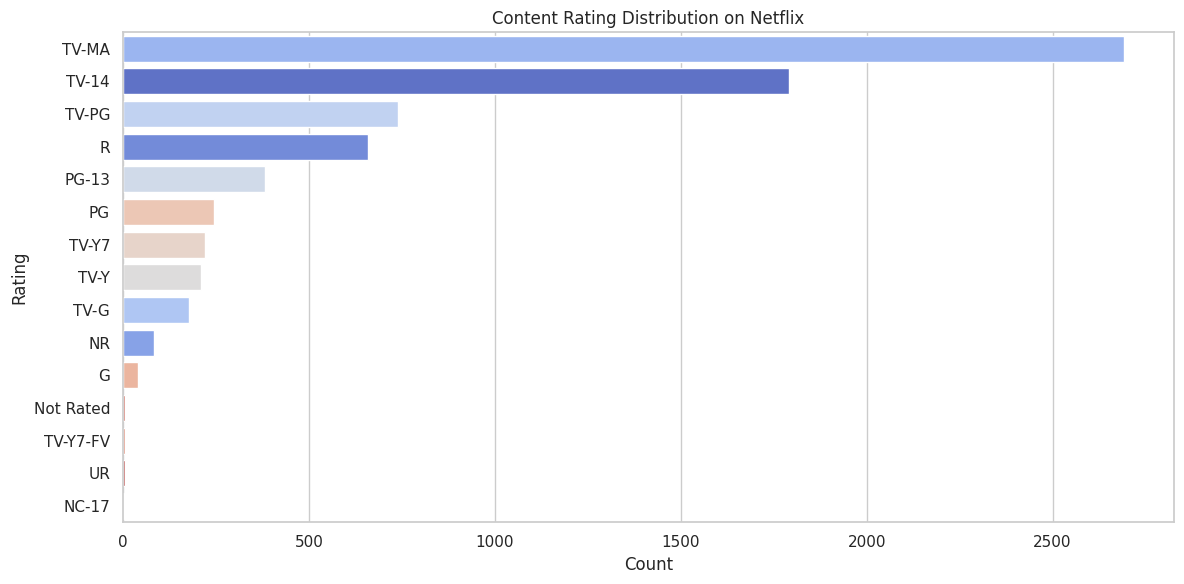

In [194]:
sns.countplot(data=df, y="Rating",
              order=df['Rating'].value_counts().index,
              hue=df['Rating'], palette="coolwarm", legend=False)
plt.title("Content Rating Distribution on Netflix")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()

# **8. STRATEGIC RECOMMENDATIONS**

In [195]:
recommendations = []
total_movies = len(df[df['Category'] == "Movie"])
total_shows = len(df[df['Category'] == "TV Show"])
if total_shows > total_movies:
    recommendations.append([
        "Movies vs TV Shows",
        f"TV Shows: {total_shows}, Movies: {total_movies}",
        "Netflix should focus more on TV Shows, as they have grown faster and keep audiences engaged longer."
    ])
else:
    recommendations.append([
        "Movies vs TV Shows",
        f"Movies: {total_movies} \nTV Shows: {total_shows}",
        "Movies are still dominant, but Netflix should strengthen TV Show production to match global binge-watching trends."
    ])
top_genre = df['Type'].value_counts().idxmax()
least_genres = df['Type'].value_counts().tail(3).index.tolist()
recommendations.append([
    "Genres",
    f"Most common: {top_genre} \nLeast common: {', '.join(least_genres)}",
    f"Netflix should keep investing in {top_genre}, but expand into {', '.join(least_genres)} which are underrepresented but have global demand."
])
top_country = df['Country'].value_counts().idxmax()
top_countries = df['Country'].value_counts().iloc[1:10].index.tolist()
recommendations.append([
    "Countries",
    f"Top contributor: {top_country} \nOther strong: {', '.join(top_countries)}",
    f"Netflix should expand localized content in {', '.join(top_countries[1:])}, which are gaining popularity globally."
])
top_rating = df['Rating'].value_counts().idxmax()
recommendations.append([
    "Ratings",
    f"Most frequent rating: {top_rating}",
    f"Netflix has many {top_rating} titles. To reach more families, it should increase PG and Kids-rated content."
])
recommendations.append([
    "Competition",
    "Disney+ strong in Kids, Prime strong in Regional",
    "Netflix should differentiate by strengthening Originals, global stories, and balancing family + adult content."
])
print("\nStrategic Recommendations: \n")
print(tabulate(recommendations, headers=["Area", "Analysis Result", "Recommendation"], tablefmt="fancy_grid"))


Strategic Recommendations: 

╒════════════════════╤══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╕
│ Area               │ Analysis Result                                                                                                                                                                                      │ Recommendation                                                                                                                                                                                                                    